In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
mcdonalds = pd.read_csv("E:\mcdonalds.csv")  
mcdonalds.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [3]:
mcdonalds.columns # Display variable names

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
mcdonalds.shape # Display dimensions

(1453, 15)

In [5]:
print(mcdonalds.head(3)) # Display the first three rows

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  


In [6]:
#Select the first 11 columns and convert to binary format
MD_x = mcdonalds.iloc[:, :11].apply(lambda x: LabelEncoder().fit_transform(x.astype(str)))
MD_x = MD_x.values

In [7]:
col_means = np.round(MD_x.mean(axis=0), 2) # Calculate column means and round the results
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [76]:
def labelling(x):
    mcdonalds[x] = LabelEncoder().fit_transform(mcdonalds[x])
    return mcdonalds

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
     'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
0,0,1,0,1,0,1,1,0,1,0,0,2,61,0,0,-3.0
1,1,1,0,1,1,1,1,1,1,0,0,6,51,0,0,2.0
2,0,1,1,1,1,1,0,1,1,1,0,5,62,0,0,1.0
3,1,1,0,1,1,1,1,1,0,0,1,8,69,4,0,4.0
4,0,1,0,1,1,1,1,0,0,1,0,6,49,3,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1,NaN
1449,1,1,0,1,0,0,1,1,0,1,0,6,36,4,0,2.0
1450,1,1,0,1,0,1,0,1,1,0,0,7,52,3,0,3.0
1451,1,1,0,0,0,1,1,1,0,1,0,8,41,0,1,4.0


In [9]:
pca= PCA()
MD_pca = pca.fit(MD_x)

In [10]:
explained_variance = MD_pca.components_
pd.DataFrame(explained_variance)
explained_variance

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

In [11]:
# Get the standard deviation, singular values, and explained variance ratios
std_dev = np.std(MD_x, axis=0)
singular_values = pca.singular_values_
explained_variance_ratios = pca.explained_variance_ratio_

# Calculate the cumulative proportion of variance explained
cumulative_var_exp = np.cumsum(explained_variance_ratios)

# Create a DataFrame
p = pd.DataFrame({'Standard Deviation': std_dev,
                       'Singular_values': singular_values,
                       'Cumulative Proportion of Variance Explained': cumulative_var_exp,
                       'Proportion of Variance Explained': explained_variance_ratios})

# Print the DataFrame
print(p)


    Standard Deviation  Singular_values  \
0             0.497220        28.847461   
1             0.289340        23.147166   
2             0.291271        19.228584   
3             0.339389        15.196267   
4             0.499297        12.856858   
5             0.299725        11.823051   
6             0.490149        11.038951   
7             0.478760        10.483555   
8             0.479377        10.107424   
9             0.399172         9.482147   
10            0.428863         9.027211   

    Cumulative Proportion of Variance Explained  \
0                                      0.299447   
1                                      0.492244   
2                                      0.625290   
3                                      0.708386   
4                                      0.767866   
5                                      0.818166   
6                                      0.862015   
7                                      0.901563   
8                       

In [12]:
std = np.round(np.sqrt(MD_pca.explained_variance_),1)
rotation_matrix = np.round (MD_pca.components_,3)
proportion_varaiance = np.round(MD_pca.explained_variance_ratio_,1)

#creating a data frame
#two principal components for the rotataion matrix 
pca_res= pd.DataFrame({ 'Standard Deviation': std,
                    'Rotation Matrix (pc1)': rotation_matrix[0],
                    'Rotation Matrix (pc2)': rotation_matrix[1],
                    'proportion of variance explained':proportion_varaiance})
pca_res

,Standard Deviation,Rotation Matrix (pc1),Rotation Matrix (pc2),proportion of variance explained
0,0.8,-0.477,0.364,0.3
1,0.6,-0.155,0.016,0.2
2,0.5,-0.006,0.019,0.1
3,0.4,0.116,-0.034,0.1
4,0.3,0.304,-0.064,0.1
5,0.3,-0.108,-0.087,0.1
6,0.3,-0.337,-0.611,0.0
7,0.3,-0.472,0.307,0.0
8,0.3,0.329,0.601,0.0
9,0.2,-0.214,0.077,0.0


In [13]:
pd.DataFrame(rotation_matrix.T).shape #pd.DataFrame(pca.components_.T).shape

(11, 11)

In [ ]:
# Perform Principal Component Analysis
pca = PCA(n_components=11)
MD_pca = pca.fit_transform(MD_x) 
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = MD_pca, columns = names)
pf

In [64]:
#pd.DataFrame(MD_pca).shape
df = mcdonalds.loc[:, cat]
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [65]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


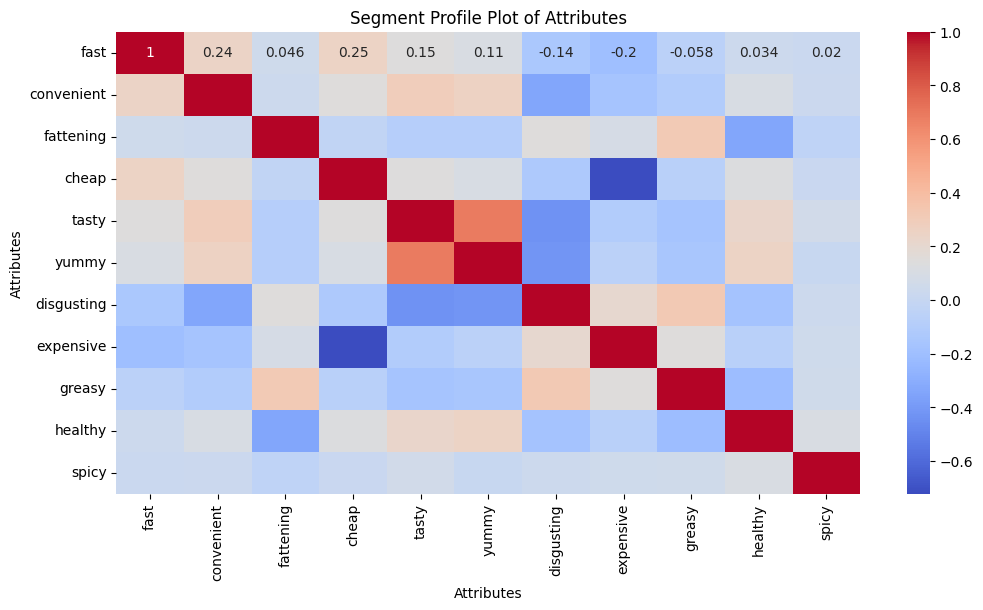

In [66]:
import seaborn as sns

# Rearranging the encoded attributes based on the hierarchical clustering order
rearranged_attributes = encoded_attributes[order]

# Creating a segment profile plot
plt.figure(figsize=(12, 6))
sns.heatmap(rearranged_attributes.corr(), annot=True, cmap='coolwarm')
plt.title("Segment Profile Plot of Attributes")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()


In [67]:
pd.DataFrame(pca.components_.T).shape

(11, 11)

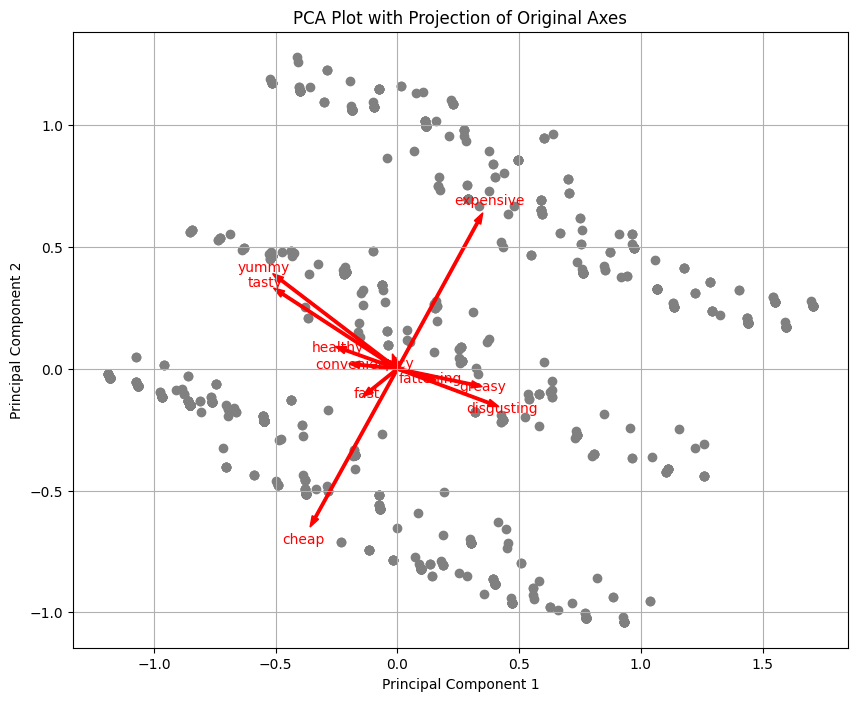

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD_pca is your data and cat is a list of categories
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Plot PCA
plt.figure(figsize=(10, 8))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')

for i, (component, category) in enumerate(zip(pca.components_.T, cat)):
    plt.arrow(0, 0, component[0], component[1], color='red', width=0.01, head_width=0.03)
    plt.text(component[0] * 1.15, component[1] * 1.15, category, color='red', ha='center', va='center')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Plot with Projection of Original Axes")
plt.grid()
plt.axis('equal')
plt.show()


# Using K-means:

In [69]:
from sklearn.cluster import KMeans
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x)

In [70]:
#Function to perfrm k-means with mutiple random retarts
def kmeans_clustering(data,n_clusters,n_init):
    kmeans = KMeans(n_clusters =n_clusters, n_init = n_init, random_state=1234)
    kmeans.fit(data)
    return kmeans.labels_,kmeans

In [71]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [72]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

In [73]:
# Simulated data with 11 features
np.random.seed(0)
data = np.random.rand(100, 11)  # put you data here Md_x

num_clusters_range = range(2, 9)  # Clusters range
num_bootstrap_samples = 100  # Number of bootstrap samples
num_replications = 10  # Number of k-means replications


In [74]:
# Function to perform k-means clustering
def perform_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=None)  # Random state None for different initializations
    return kmeans.fit_predict(data)

# Function to generate a bootstrap sample
def generate_bootstrap_sample(data):
    return resample(data)

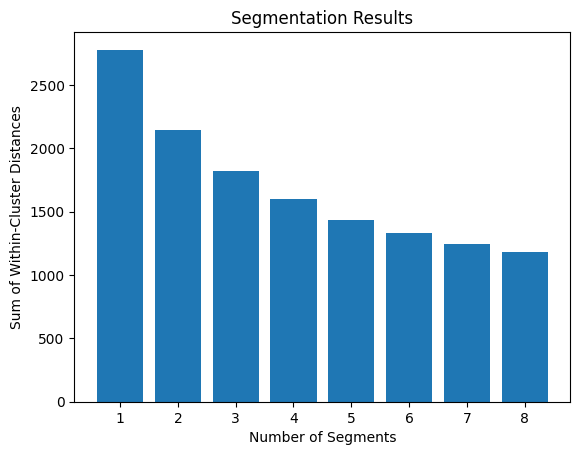

In [28]:
from sklearn.cluster import KMeans
np.random.seed(1234) # Set the random seed for reproducibility
nrep = 10 # Number of repetitions for KMeans
num_segments = range(1, 9) # Range of number of segments (clusters)
within_cluster_distances = [] # List to store within-cluster distances for each number of segments

# Dictionary to store KMeans models for each number of segments
MD_km28 = {}

# Loop over different numbers of segments
for k in num_segments:
    # Create KMeans model with k segments, perform nrep repetitions
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x) 
    within_cluster_distances.append(kmeans.inertia_) # Append the sum of within-cluster distances to the list

    MD_km28[str(k)] = kmeans # Store the KMeans model in the dictionary

# Plotting the results
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-Cluster Distances")
plt.title("Segmentation Results")
plt.show()

Number of Clusters: 2
Cluster Labels: [1 0 0 ... 0 0 1]
Number of Clusters: 3
Cluster Labels: [1 0 0 ... 0 2 1]
Number of Clusters: 4
Cluster Labels: [1 3 3 ... 3 0 2]
Number of Clusters: 5
Cluster Labels: [2 3 4 ... 4 0 1]
Number of Clusters: 6
Cluster Labels: [2 5 0 ... 0 1 4]
Number of Clusters: 7
Cluster Labels: [3 5 1 ... 1 6 4]
Number of Clusters: 8
Cluster Labels: [4 2 5 ... 5 3 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


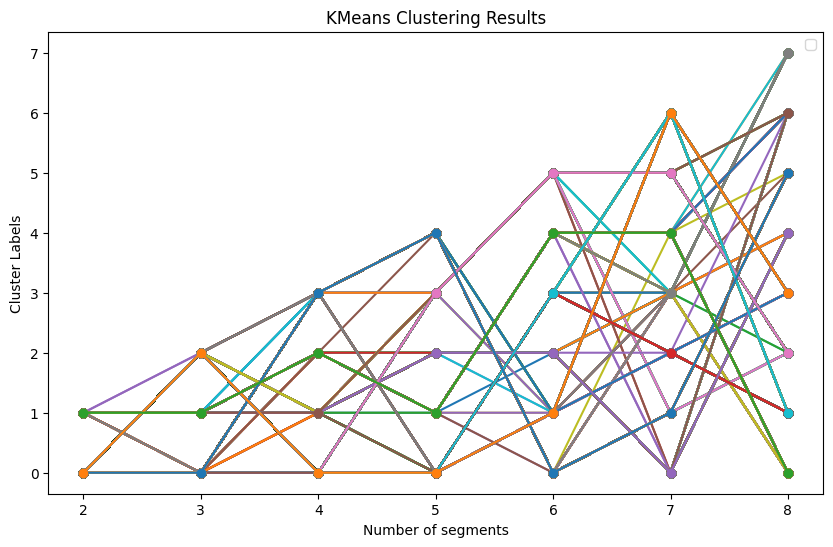

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Set seed for reproducibility
np.random.seed(1234)

# Assuming MD.x is your data, replace it with your actual data
# MD.x = ...

# Perform KMeans clustering for different numbers of clusters (2 to 8)
n_clusters_range = range(2, 9)
MD_km28 = []

for n_clusters in n_clusters_range:
    # Repeat clustering 10 times and choose the best result based on silhouette score
    best_inertia = float('inf')
    best_kmeans = None
    
    for _ in range(10):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        labels = kmeans.fit_predict(MD_x)
        inertia = kmeans.inertia_
        
        # Update best result if the current inertia is lower
        if inertia < best_inertia:
            best_inertia = inertia
            best_kmeans = kmeans

    # Relabel clusters based on the best result
    best_labels = best_kmeans.labels_

    # Store the results
    MD_km28.append(best_labels)

    # Print or use the results as needed
    print(f"Number of Clusters: {n_clusters}")
    print("Cluster Labels:", best_labels)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), MD_km28, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Cluster Labels')
plt.title('KMeans Clustering Results')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import adjusted_rand_score

<Figure size 640x480 with 0 Axes>

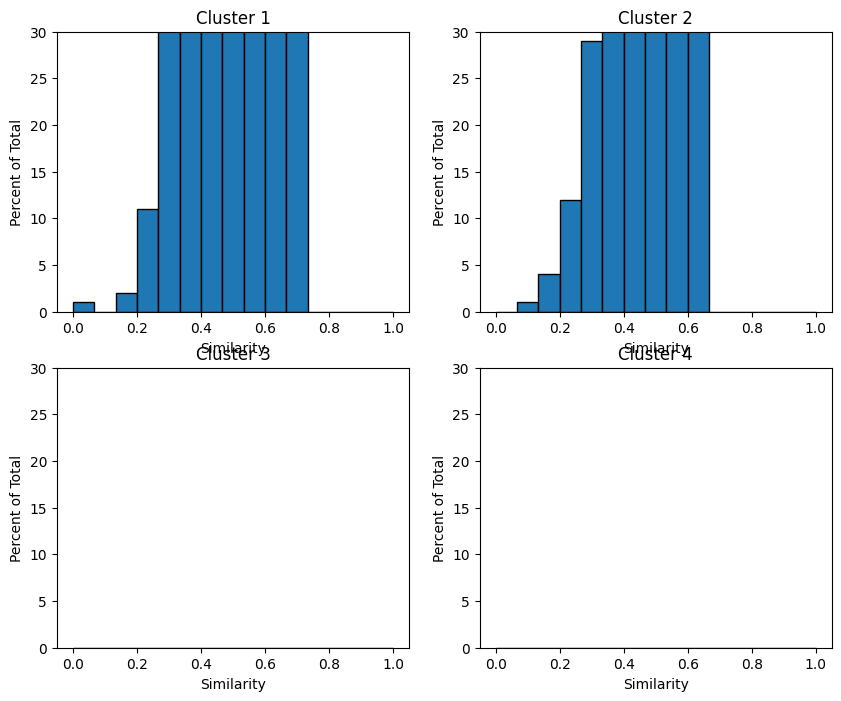

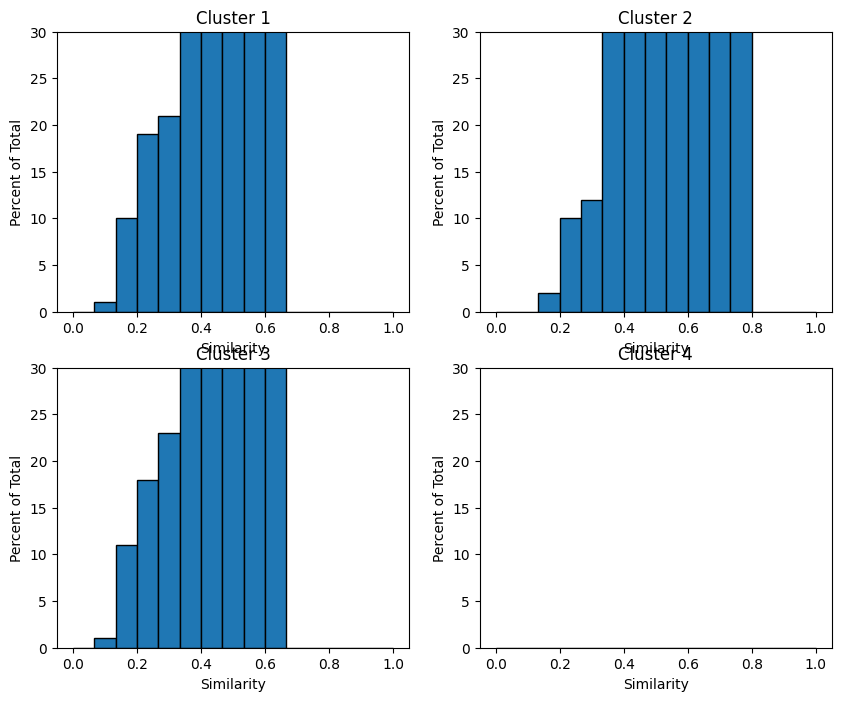

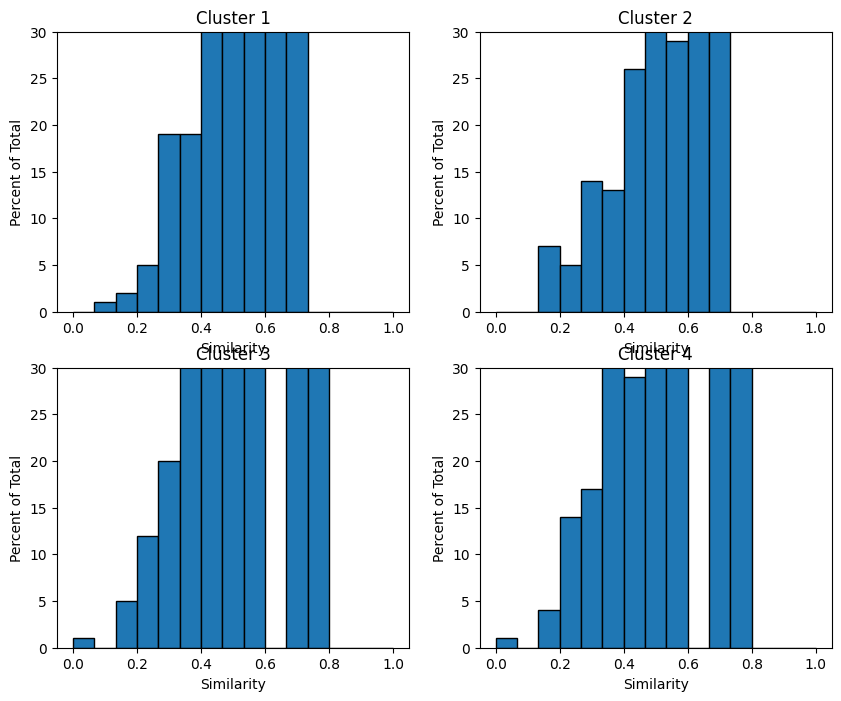

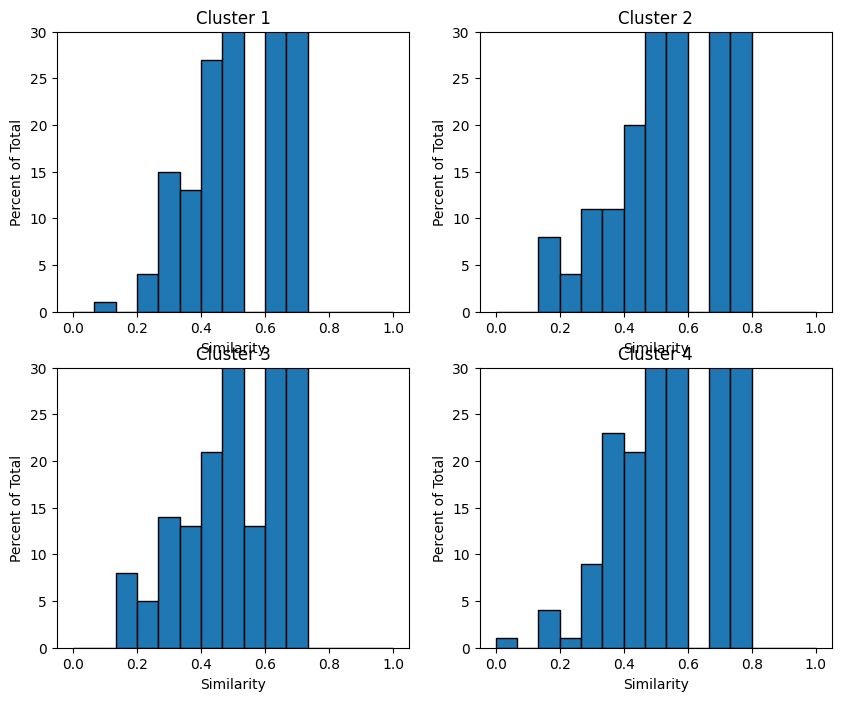

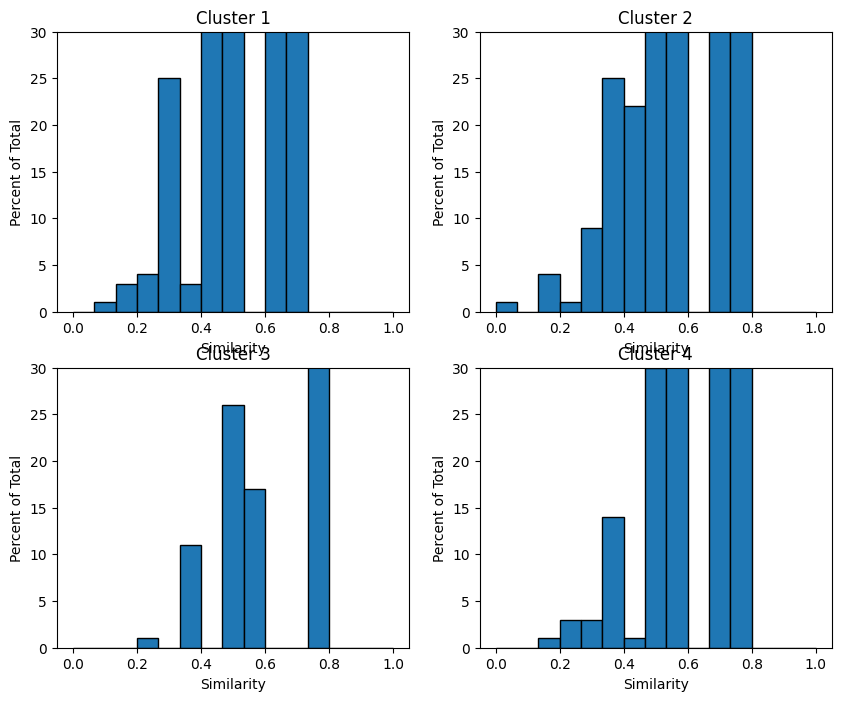

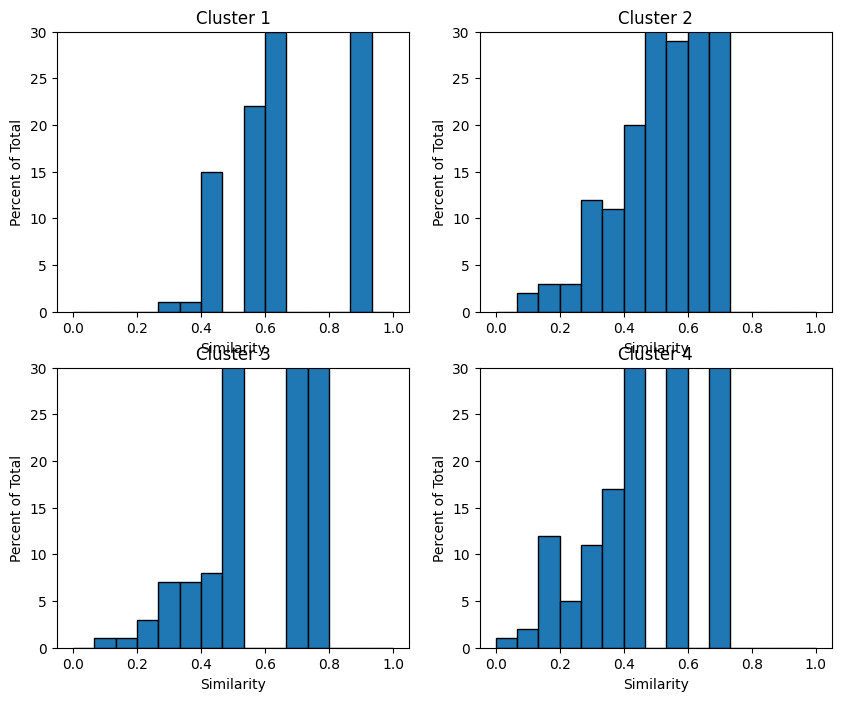

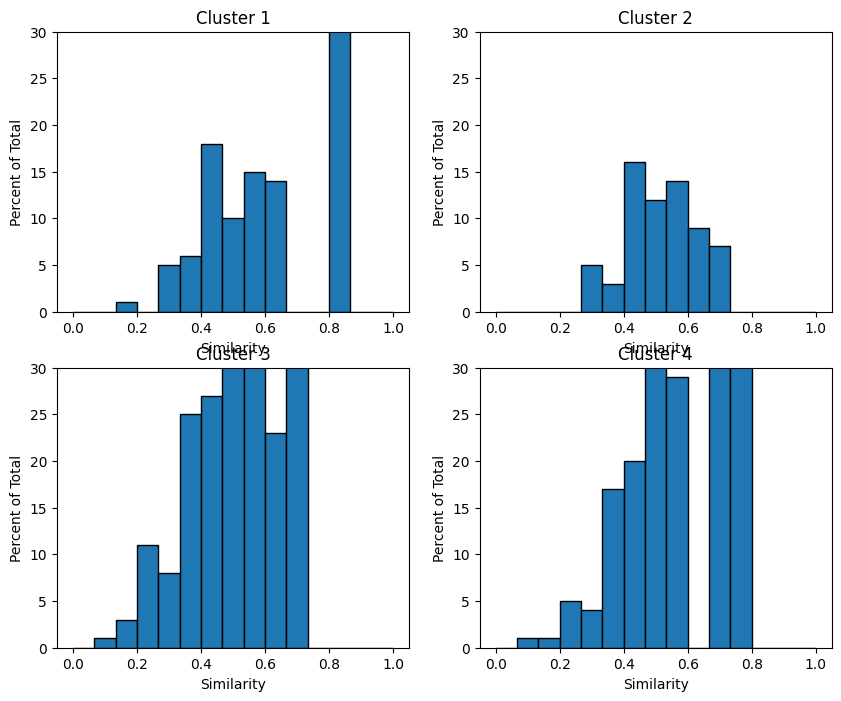

In [31]:
from sklearn.cluster import KMeans

num_clusters_range = range(2, 9)
num_replications = 10

# Function to perform k-means clustering
def perform_kmeans(data, n_clusters):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()  # To do easy iteration
    
    for i in range(4):
        kmeans = KMeans(n_clusters=n_clusters, random_state=None)
        labels = kmeans.fit_predict(data)
        centroids = kmeans.cluster_centers_

        distances = np.sqrt(((data - centroids[labels]) ** 2).sum(axis=1))
        similarities = 1 - (distances / np.max(distances))

        cluster_similarities = similarities[labels == i]
        axes[i].hist(cluster_similarities, bins=15, range=(0, 1), edgecolor='black')
        axes[i].set_title(f'Cluster {i + 1}')
        axes[i].set_xlabel('Similarity')
        axes[i].set_ylabel('Percent of Total')
        axes[i].set_ylim(0, 30)

plt.tight_layout()
plt.show()

# Perform k-means clustering for each number of clusters
for num_clusters in num_clusters_range:
    perform_kmeans(MD_x, num_clusters)


In [32]:
from scipy.stats import entropy
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())  # Normalize counts to get probabilities
    class_entropy = entropy(probs, base=2)  # Specify base for log
    icl = (bic - class_entropy)
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)


   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.609855
1     5       True  3   3 -1818.708282  3643.416565  3659.260722  3657.716896
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.391445
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2903.331298
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2704.447178
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.034569
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2419.540942


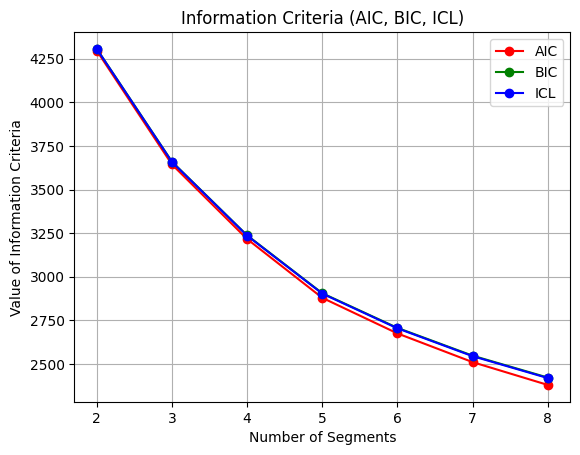

In [33]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC', color = 'r')
plt.plot(num_segments, BIC_values, marker='o', label='BIC', color = 'g')
plt.plot(num_segments, ICL_values, marker='o', label='ICL', color = 'b')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [34]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD_x[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))


mixture    0    1    2    3
kmeans                     
0         13  299   10  191
1          1    0  176  189
2        113    0   21  108
3         33  127    8  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [35]:
from sklearn.mixture import GaussianMixture

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD with model m4a:", log_likelihood_m4a)
print("Log-likelihood for MD with model m4:", log_likelihood_m4)


Log-likelihood for MD with model m4a: 10.291125272986944
Log-likelihood for MD with model m4: 10.802964892310818


In [36]:
import pandas as pd
like_counts = pd.value_counts(mcdonalds['Like'])
reversed_counts = like_counts.iloc[::-1]
print(reversed_counts)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: Like, dtype: int64


In [37]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}


In [38]:
unique_values = mcdonalds['Like'].unique()
print(unique_values)

['-3' '2' '1' '4' 'I love it!+5' 'I hate it!-5' '-2' '3' '0' '-4' '-1']


In [39]:
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

In [40]:
like_n_counts = mcdonalds['Like.n'].value_counts()


print(like_n_counts)

 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like.n, dtype: int64


In [41]:
pip install patsy

Note: you may need to restart the kernel to use updated packages.


In [42]:
from patsy import dmatrices
independent_vars = mcdonalds.columns[0:11] 

In [43]:
formula_str = ' + '.join(independent_vars)

In [44]:
formula_str = 'Like ~ ' + formula_str

In [45]:
f = dmatrices(formula_str, data=mcdonalds)[1]

In [46]:
print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [47]:
pip install scikit-mixture

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-mixture (from versions: none)
ERROR: No matching distribution found for scikit-mixture


In [48]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from patsy import dmatrix

In [49]:
f = "Like ~ convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting"

In [50]:
# Extract features from the design matrix
features = np.asarray(MD_x)

# Set seed
np.random.seed(1234)

n_components = 2
n_init = 10
verbose = False

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
model.fit(features)

print(model)
cluster_sizes = np.bincount(model.predict(features))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


In [51]:
from sklearn.cluster import KMeans
np.random.seed(1234) # Set the random seed for reproducibility
nrep = 10 # Number of repetitions for KMeans
num_segments = range(1, 9) # Range of number of segments (clusters)
within_cluster_distances = [] # List to store within-cluster distances for each number of segments

# Dictionary to store KMeans models for each number of segments
MD_km28 = {}

# Loop over different numbers of segments
for k in num_segments:
    # Create KMeans model with k segments, perform nrep repetitions
    kmeans = KMeans(n_clusters=3, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x) 
    within_cluster_distances.append(kmeans.inertia_) # Append the sum of within-cluster distances to the list

    MD_km28[str(k)] = kmeans # Store the KMeans model in the dictionary

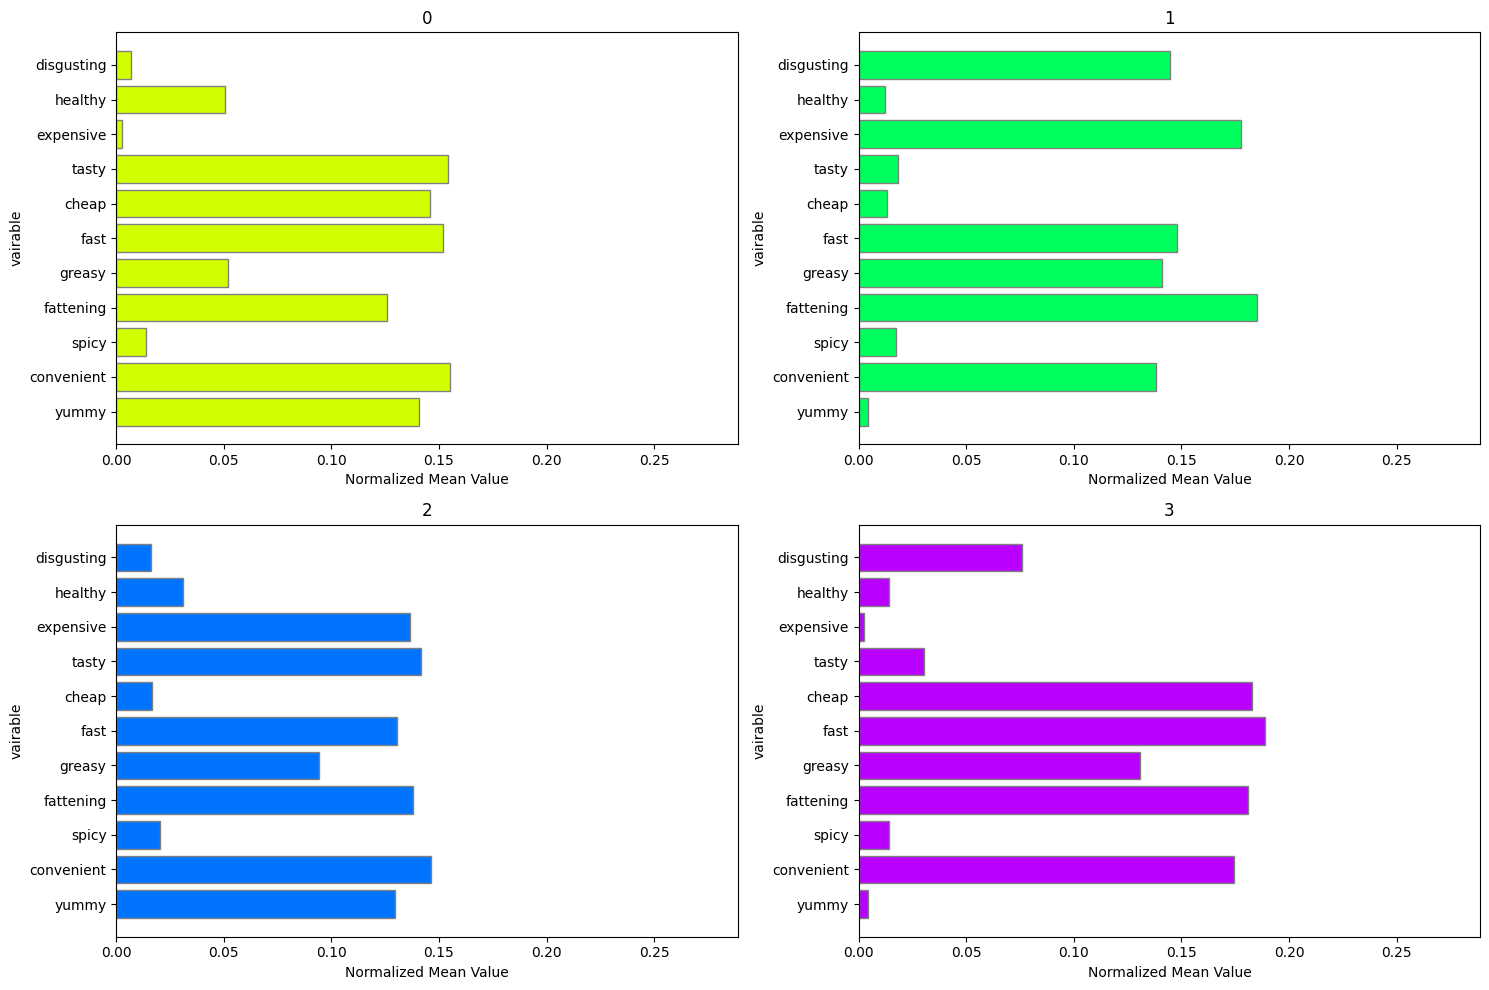

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming 'encoded_attributes' is your DataFrame with encoded data
# and 'segments' is the result from your KMeans clustering
# Assuming 'encoded_attributes' is your DataFrame with encoded data
# and you want to use KMeans with, for example, 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
segments = kmeans.fit_predict(encoded_attributes)

# Adding the segment labels to the encoded data
#encoded_data_with_segments = encoded_attributes.copy()
#encoded_data_with_segments['Segment'] = segments


# Adding the segment labels to the encoded data
encoded_data_with_segments = encoded_attributes.copy()
encoded_data_with_segments['Segment'] = segments

# Calculating the mean of each attribute for each segment
segment_means = encoded_data_with_segments.groupby('Segment').mean().iloc[:, :11]  # Selecting only the first 11 columns which are attributes

# Creating a figure for the subplots
plt.figure(figsize=(15, 10))

# Normalizing the segment means for better visualization
normalized_segment_means = (segment_means.T / segment_means.T.sum()).T

# Plotting the bar plots for each segment in separate subplots
for i, segment in enumerate(normalized_segment_means.index):
    # Creating a subplot in a 2x2 layout
    plt.subplot(2, 2, i+1)
    
    # Plotting horizontal bar plot for the current segment
    plt.barh(normalized_segment_means.columns, normalized_segment_means.loc[segment],
             color=sns.color_palette("hsv", 4)[i],  # Using a color palette for differentiation
             edgecolor='grey',
             label=f'{df.index}'
             )
    
    # Setting the title for each subplot to indicate the segment
    #plt.title( df.index[i] : f'{segment}')
    plt.title(f'{df.index[i]}')

    
    # Optionally, adjust the x-axis limits for uniformity across subplots
    plt.xlim(0, normalized_segment_means.values.max() + 0.1)

    # Adding labels to the subplot
    plt.xlabel('Normalized Mean Value')
    plt.ylabel('vairable')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [53]:
MD_km28

{'1': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '2': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '3': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '4': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '5': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '6': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '7': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '8': KMeans(n_clusters=3, n_init=10, random_state=1234)}

In [54]:
import pandas as pd

# Assuming MD is a NumPy array
MD_df = pd.DataFrame(MD_x)

# Check the data types of columns in the DataFrame
print(MD_df.dtypes)


0     int32
1     int32
2     int32
3     int32
4     int32
5     int32
6     int32
7     int32
8     int32
9     int32
10    int32
dtype: object


Unique values in 'Cluster': [1 0 2]
Unique values in 'Gender': [0 1]
Gender     0    1
Cluster          
0        161  177
1        257  242
2        370  246


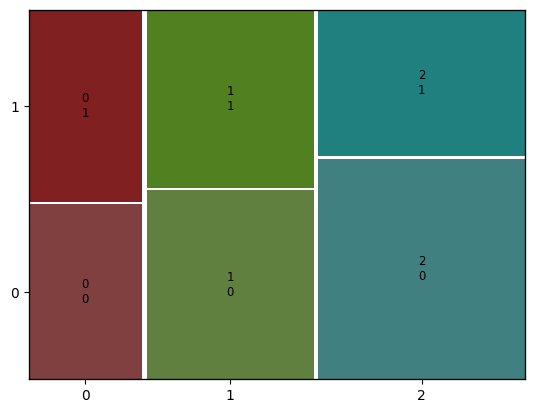

In [79]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4 = MD_km28['4']
k4 = MD_k4.labels_

# Create a DataFrame with clustering labels and the 'Gender' column
df_for_mosaic = pd.DataFrame({'Cluster': k4, 'Gender': mcdonalds['Gender']})

# Check the unique values in 'Cluster' and 'Gender' to understand the mismatch
print("Unique values in 'Cluster':", df_for_mosaic['Cluster'].unique())
print("Unique values in 'Gender':", df_for_mosaic['Gender'].unique())

# Create a crosstab based on the modified DataFrame
ct = pd.crosstab(df_for_mosaic['Cluster'], df_for_mosaic['Gender'])

# Display the crosstab
print(ct)

# Use the mosaic plot
mosaic(ct.stack(), gap=0.01)
plt.show()


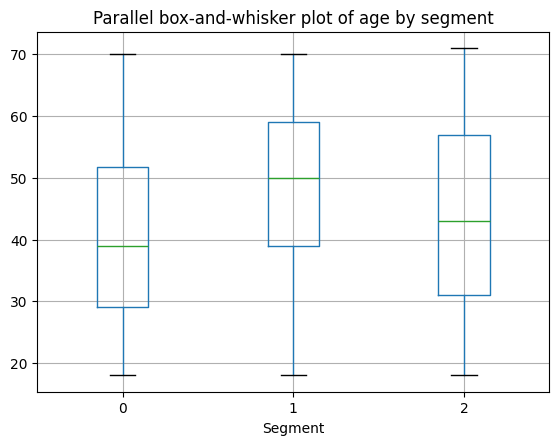

In [80]:
df = pd.DataFrame({'Segment': k4, 'Age': mcdonalds['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

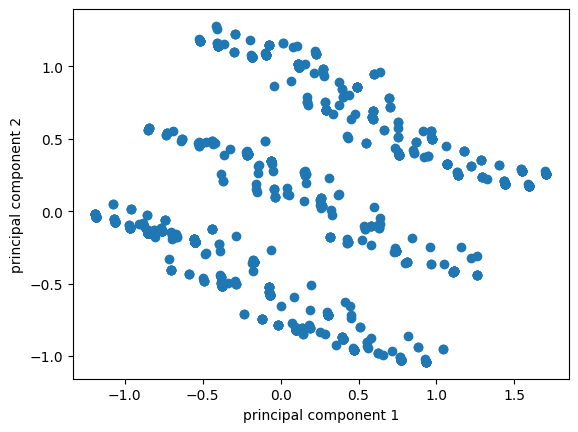

In [91]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD_x)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [81]:
from sklearn.preprocessing import LabelEncoder

# Selecting only the attributes for clustering
attributes = mcdonalds.iloc[:, :11]

# Encoding the categorical data (Yes/No) to numeric (1/0)
label_encoder = LabelEncoder()
encoded_attributes = attributes.apply(label_encoder.fit_transform)

# Transposing the data to perform clustering on attributes
transposed_attributes = encoded_attributes.T

# Display the encoded and transposed attributes
transposed_attributes

,0,1,2,3,4,5,6,7,8,9,...,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452
yummy,0,1,0,1,0,1,1,1,0,1,...,1,0,0,1,0,0,1,1,1,0
convenient,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
spicy,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fattening,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
greasy,0,1,1,1,1,0,0,1,1,1,...,0,1,1,1,1,1,0,0,0,1
fast,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,0,0,0,1,1,0
cheap,1,1,0,1,1,1,0,1,0,0,...,1,1,1,1,0,0,1,0,1,0
tasty,0,1,1,1,0,1,1,1,0,1,...,1,0,1,1,1,0,1,1,1,0
expensive,1,1,1,0,0,0,1,0,1,1,...,0,0,0,0,1,1,0,1,0,1
healthy,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0


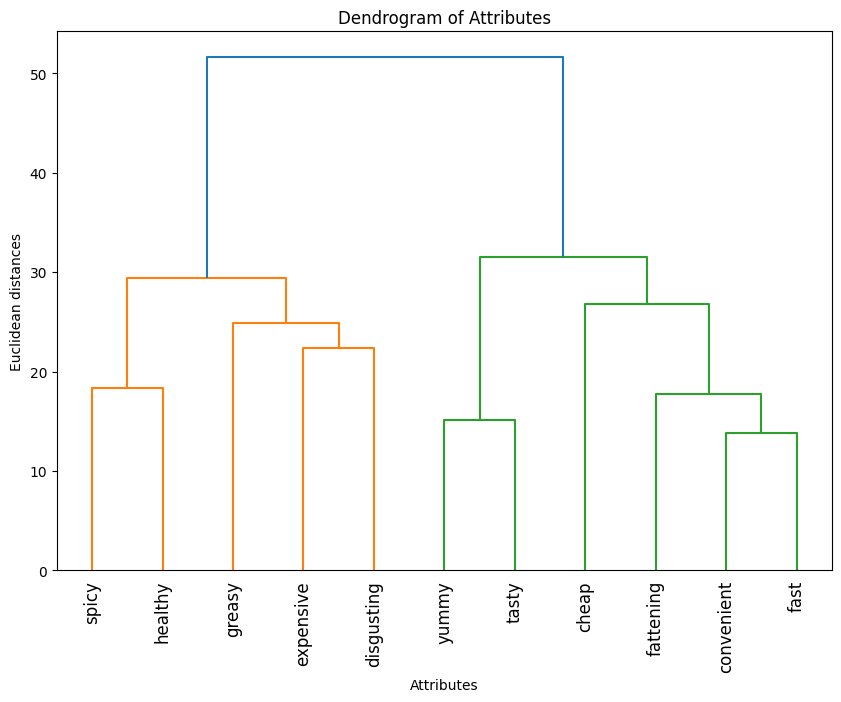

In [82]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Performing hierarchical clustering
linked_attributes = linkage(transposed_attributes, method='ward')

# Creating a dendrogram to visualize the clustering
plt.figure(figsize=(10, 7))
dendrogram(linked_attributes, labels=transposed_attributes.index, leaf_rotation=90)
plt.title("Dendrogram of Attributes")
plt.xlabel("Attributes")
plt.ylabel("Euclidean distances")
plt.show()

# Extracting the order of attributes from the clustering
order = [transposed_attributes.index[i] for i in dendrogram(linked_attributes, no_plot=True)['leaves']]
order.reverse()  # Reverse the order as per the requirement


In [87]:
MD_km28

{'1': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '2': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '3': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '4': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '5': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '6': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '7': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '8': KMeans(n_clusters=3, n_init=10, random_state=1234)}

In [96]:
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.738220
1,1,2.582090
2,2,2.547912
3,3,2.689970


In [97]:
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
Like = mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,6.054974
1,1,5.626866
2,2,5.542998
3,3,6.696049


In [99]:
mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
Gender = mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.476440
1,1,0.453731
2,2,0.427518
3,3,0.477204


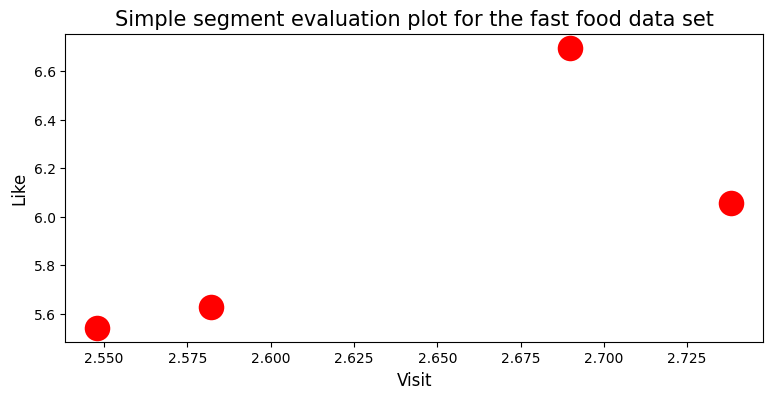

In [100]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()